In [90]:
import numpy as np
import pandas as pd
import spectrum
import seaborn as sns
import matplotlib.pyplot as plt
from pyleoclim import Spectral
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

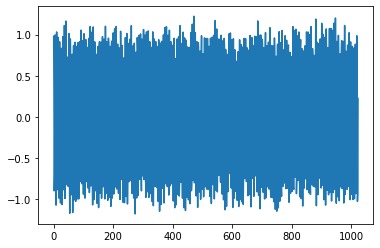

In [84]:
# test signal
data = spectrum.data_cosine(N=1024, A=0.1, sampling=1024, freq=200)
plt.plot(np.arange(1024), data)

Periodogram PSD estimate
    Data length is 1024
    PSD length is 2049
    Sampling 1024
    freq resolution 0.25
    datatype is real
    sides is onesided
    scal_by_freq is False



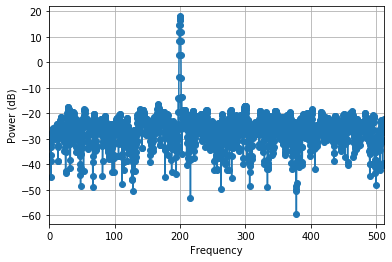

In [58]:
# periodgram
p = spectrum.Periodogram(data, sampling=1024, NFFT=4096)
print(p)
p.plot(marker='o')

Correlogram PSD estimate
    Data length is 1024
    PSD length is 2049
    Sampling 1024
    freq resolution 0.25
    datatype is real
    sides is onesided
    scal_by_freq is True



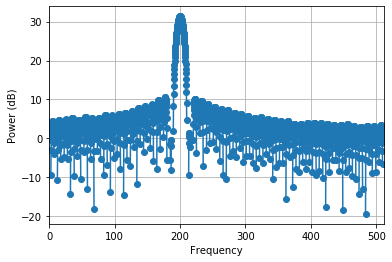

In [59]:
# pcorrelogram
p = spectrum.pcorrelogram(data, lag=100, sampling=1024, NFFT=4096)
print(p)
p.plot(marker='o')

Spectrum summary
    Data length is 1024
    PSD length is 2049
    Sampling 1024
    freq resolution 0.25
    datatype is real
    sides is onesided
    scal_by_freq is True



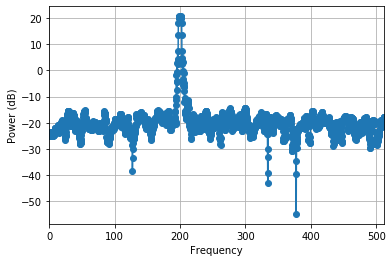

In [62]:
# mtm
p = spectrum.MultiTapering(data, NW=2.5, NFFT=4096, sampling=1024)
print(p)
p.plot(marker='o')

Minimum Variance spectral estimation
    Data length is 1024
    PSD length is 2049
    Sampling 1024
    freq resolution 0.25
    datatype is real
    sides is onesided
    scal_by_freq is False



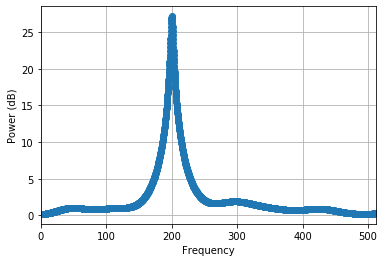

In [64]:
# minimum of variance
p = spectrum.pminvar(data, 15, NFFT=4096, sampling=1024)
print(p)
p.plot(marker='o')

EV PSD estimate
    Data length is 1024
    PSD length is 2049
    Sampling 1024
    freq resolution 0.25
    datatype is real
    sides is onesided
    scal_by_freq is False



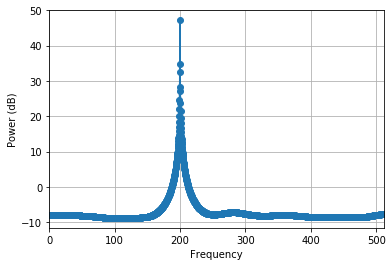

In [65]:
# eigenvalue
p = spectrum.pev(data, 18, NFFT=4096, sampling=1024)
print(p)
p.plot(marker='o')

Music PSD estimate
    Data length is 1024
    PSD length is 2049
    Sampling 1024
    freq resolution 0.25
    datatype is real
    sides is onesided
    scal_by_freq is False



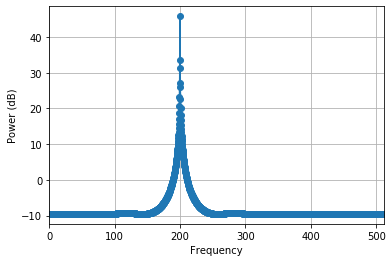

In [66]:
# MUSIC (eigenvalues decomposition)
p = spectrum.pmusic(data, 18, NFFT=4096, sampling=1024)
print(p)
p.plot(marker='o')

PYule PSD estimate
    Data length is 1024
    PSD length is 2049
    Sampling 1024
    freq resolution 0.25
    datatype is real
    sides is onesided
    scal_by_freq is True



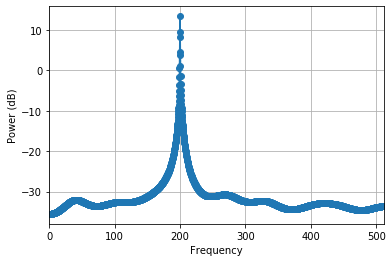

In [67]:
# Yule-Walker (autocorrelation sequence)
p = spectrum.pyule(data, 18, NFFT=4096, sampling=1024)
print(p)
p.plot(marker='o')

PYule PSD estimate
    Data length is 1024
    PSD length is 2049
    Sampling 1024
    freq resolution 0.25
    datatype is real
    sides is onesided
    scal_by_freq is True



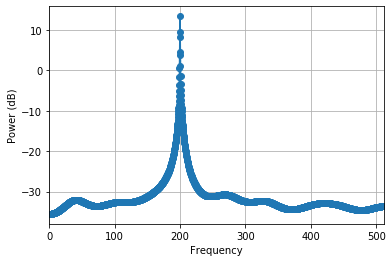

In [68]:
# Burg algorithm (reflection coefficient method)
p = spectrum.pyule(data, 18, NFFT=4096, sampling=1024)
print(p)
p.plot(marker='o')

Covariance PSD estimate
    Data length is 1024
    PSD length is 2049
    Sampling 1024
    freq resolution 0.25
    datatype is real
    sides is onesided
    scal_by_freq is False



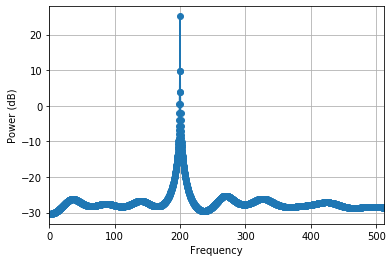

In [69]:
# covariance method
p = spectrum.pcovar(data, 18, NFFT=4096, sampling=1024)
print(p)
p.plot(marker='o')

Modified covariance PSD estimate
    Data length is 1024
    PSD length is 2049
    Sampling 1024
    freq resolution 0.25
    datatype is real
    sides is onesided
    scal_by_freq is False



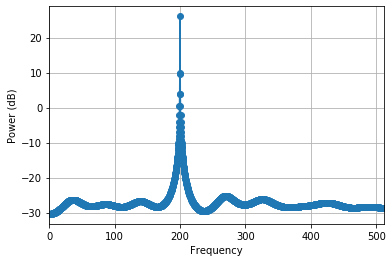

In [75]:
# modified covariance method
p = spectrum.pmodcovar(data, 18, NFFT=4096, sampling=1024)
print(p)
p.plot(marker='o')

MA (moving average) PSD estimate
    Data length is 1024
    PSD length is 2049
    Sampling 1024
    freq resolution 0.25
    datatype is real
    sides is onesided
    scal_by_freq is False



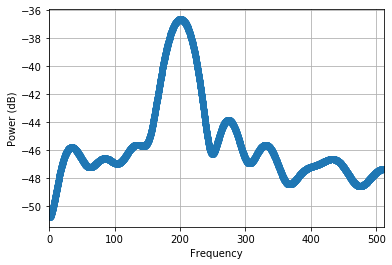

In [81]:
# MA estimator
p = spectrum.pma(data, 18, 30, NFFT=4096, sampling=1024)
print(p)
p.plot(marker='o')

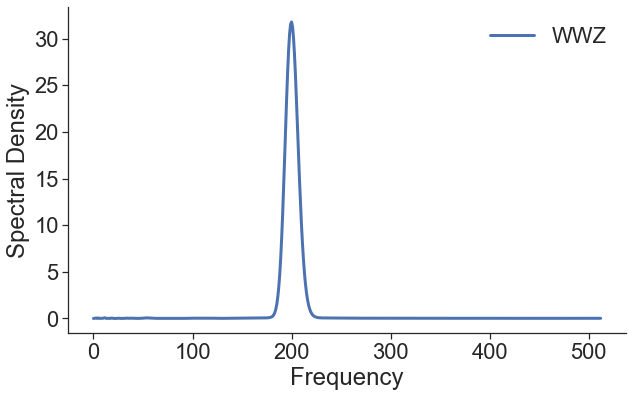

In [99]:
# WWZ
ts = np.arange(1024)
tau = np.linspace(np.min(ts), np.max(ts), 51)
res_psd = Spectral.wwz_psd(data, ts, tau=tau, nMC=0, standardize=False)


sns.set(style='ticks', font_scale=2)
fig, ax = plt.subplots(figsize=[10, 6])                                                                                                                                           
ax.plot(res_psd.freqs*1024, res_psd.psd, lw=3, label='WWZ')                                                                                                                                                          
ax.get_xaxis().set_major_formatter(ScalarFormatter())
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.set_ylabel('Spectral Density')                                                                                                                                                 
ax.set_xlabel('Frequency')                                                                                                                                                   
ax.legend(frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)